[link text](https://)# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [ ]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


In [ ]:
#Making a new Data Frame that only has the columns 'sex' and 'salary'#
#view all colums content first#
df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [ ]:
#making a new data set only for sex and salary#
df2=df[['sex', 'salary']]
df2[['sex', 'salary']]

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


In [ ]:
#Finding the Median salary for all males#
male_salary = df2[ df['sex'] == 'Male']
male_salary.median()

salary    108043.0
dtype: float64

In [ ]:
#Finding the Median salary for all females#
female_salary = df2[ df['sex'] == 'Female']
female_salary.median()

salary    103750.0
dtype: float64

In [ ]:
#finding the mean average salary for both gender#
df.groupby('sex')[['salary']].mean()

,salary
sex,
Female,101002.410256
Male,115090.418994


In [ ]:
#Comparing the Mean salary of Males and Females# 
# The difference between mean salaries of male and female

difference= male_salary.median() - female_salary.median()
print('the',(difference),'compare to each other')

the salary    4293.0
dtype: float64 compare to each other


# Data Wrangling – perform some basic transformations on the data

In [ ]:
#People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)#
print (df[df['yrs.service']>=20]['salary'].mean())
df[df['yrs.service']>=20]['salary'].count()

122520.65605095541


157

In [ ]:
#Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience#
(df[df['yrs.service']>20]['salary'].mean())-(df[df['yrs.service']<20]['salary'].mean())

14163.373384353748

In [ ]:
#People who have salary of greater than or equal to 200,000#
df[df['salary']>=200000] 

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


# Rename values, subset columns, etc

In [ ]:
df=df.rename(columns={'Unname:0':'List1', 'rank', 'discipline',	'yrs.since.phd',	'yrs.service','sex','salary'})

SyntaxError: ignored

# Create some simple visualizations showing some simple statistics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4625269d68>,
      dtype=object)

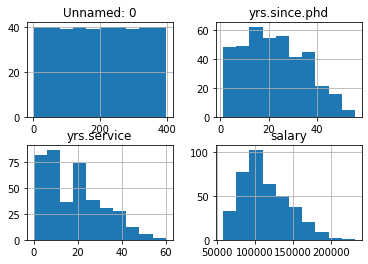

In [ ]:
df.hist()

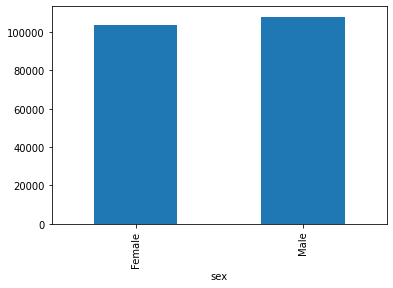

In [ ]:
#looking for the salary median between male and female#
df.groupby(['sex'])['salary'].median().plot(kind='bar')

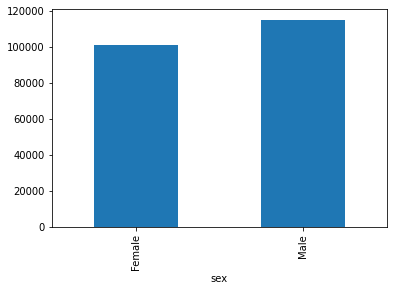

In [ ]:
#looking for the salary mean difference between male and female#
df.groupby(['sex'])['salary'].mean().plot(kind='bar')

(array([7.21410579, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.78589421]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 8 Patch objects>)

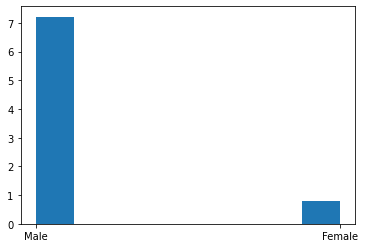

In [ ]:
#just a quick glance for male and female count#
plt.hist(df['sex'],bins=8, density=1)

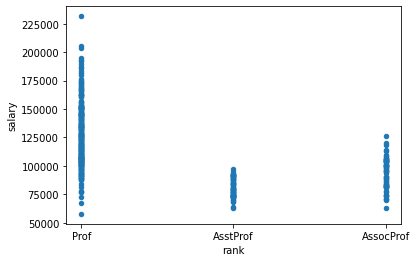

In [ ]:
#looking at position vs. salery#
df.columns
df.plot.scatter(x='rank',y='salary')

In [ ]:
#I am curious to see the difference between sex, position, and salary# 
df.groupby(['sex','rank'], sort=False)[['salary']].mean()

salary
sex    rank                    
Male   Prof       127120.822581
       AsstProf    81311.464286
       AssocProf   94869.703704
Female Prof       121967.611111
       AssocProf   88512.800000
       AsstProf    78049.909091

# Draw some conclusions based on the data.  What did you discover?

**SOME FINDINGS:**

---

*   Female Associate Professor make more than male Associate Professor
*   There are way more male professors!!!
*   Both male and female's avergae median are very close 
*   Average salary for both male and female is *$4293* 
*   Professors make so much more than associate professors and assistant  Professors


